<a href="https://colab.research.google.com/github/aderibigbeolamide/Assignment_Machine_Learning/blob/main/CreditAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Problem 1

###Home Credit
They strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
description_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HomeCredit_columns_description.csv", encoding='latin1')
data_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/application_train.csv")
print(data_df.head())
print(description_df)

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

###Problem 2

Head of the dataset:
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...          

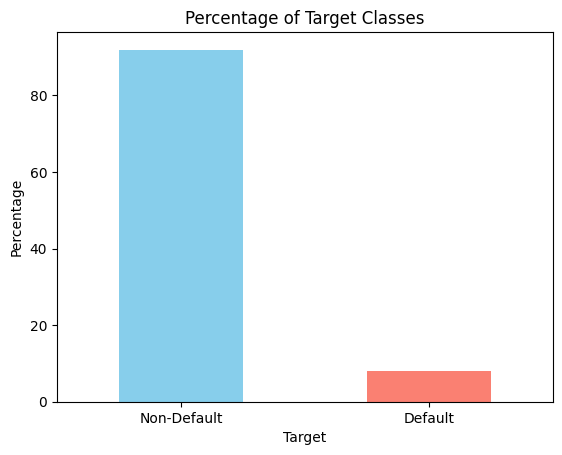

In [9]:
data_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/application_train.csv")


print("Head of the dataset:")
print(data_df.head())

print("\nInfo of the dataset:")
print(data_df.info())

print("\nDescription of the dataset:")
print(data_df.describe())


missing_values = data_df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


class_distribution = data_df['TARGET'].value_counts(normalize=True) * 100
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Percentage of Target Classes')
plt.xlabel('Target')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['Non-Default', 'Default'], rotation=0)
plt.show()

###Problem 3

###Class Imbalance
I Think the percentage on the default and Non default are imbalance, hope is not going to affect the model performance

###Data Types
Hope all the data type are corrected

###Features
How can we predict the feature performance of this

###Problem 4

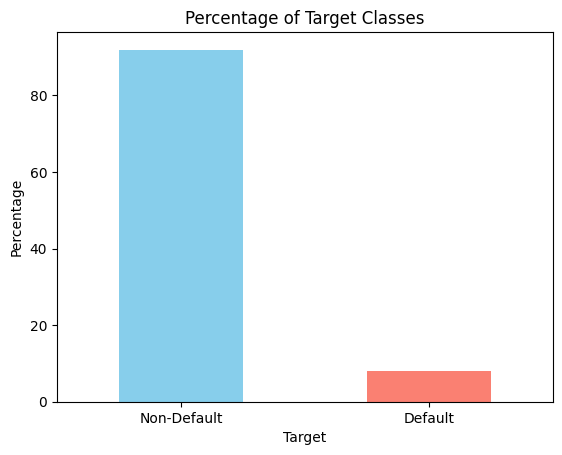

In [10]:
#Class Imbalance
class_distribution = data_df['TARGET'].value_counts(normalize=True) * 100
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Percentage of Target Classes')
plt.xlabel('Target')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['Non-Default', 'Default'], rotation=0)
plt.show()

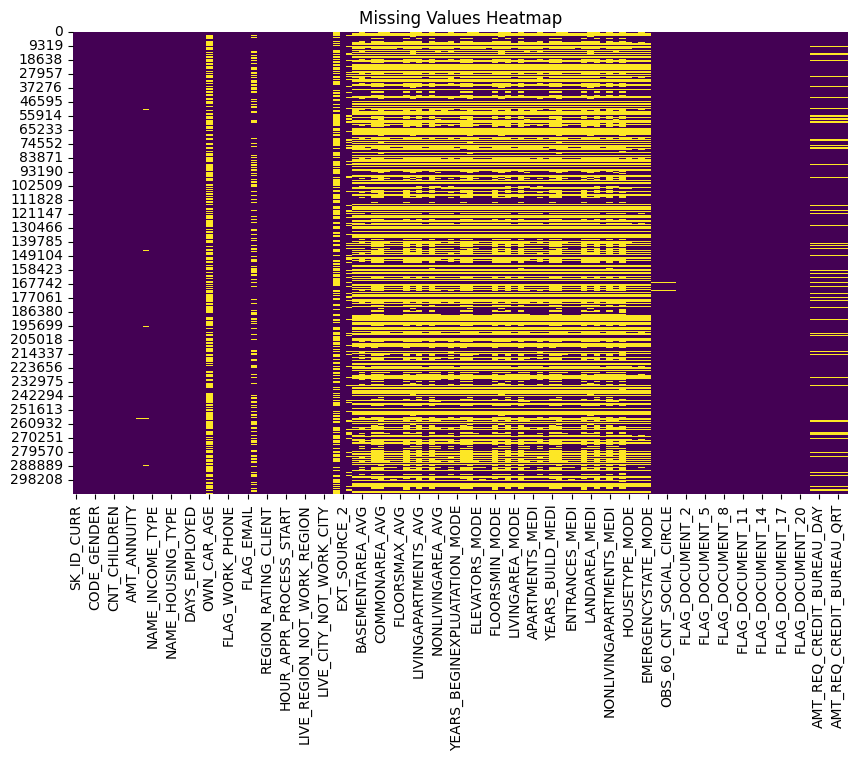

In [12]:
#Checking for the Missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data_df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

<ipython-input-13-cb8295c90c72>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_df.corr()


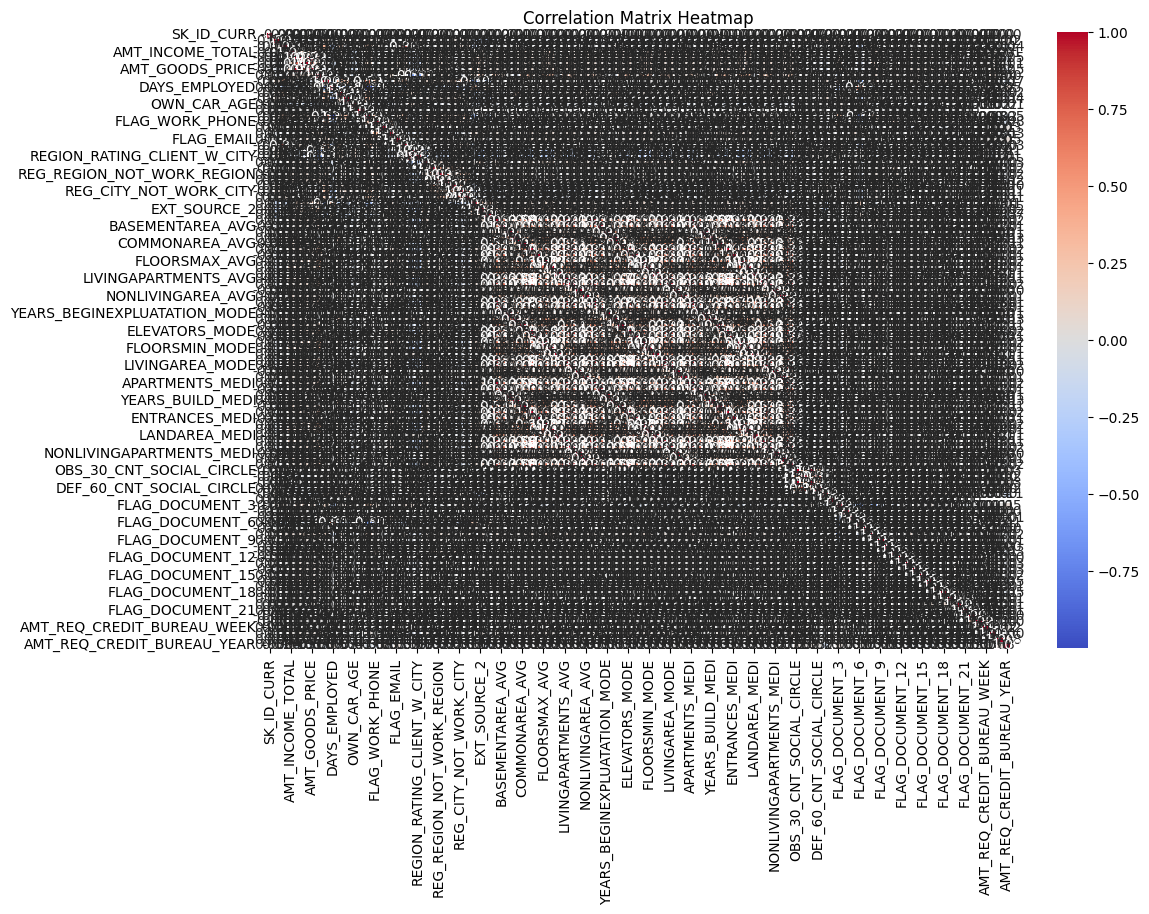

In [13]:
#Checking for the Highly features with correlation heaps
correlation_matrix = data_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
#Plotting histograms to visualize the distribution of numerical features
numerical_features = data_df.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(8, 6 * len(numerical_features)))

for i, feature in enumerate(numerical_features):
    data_df[feature].plot(kind='hist', bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

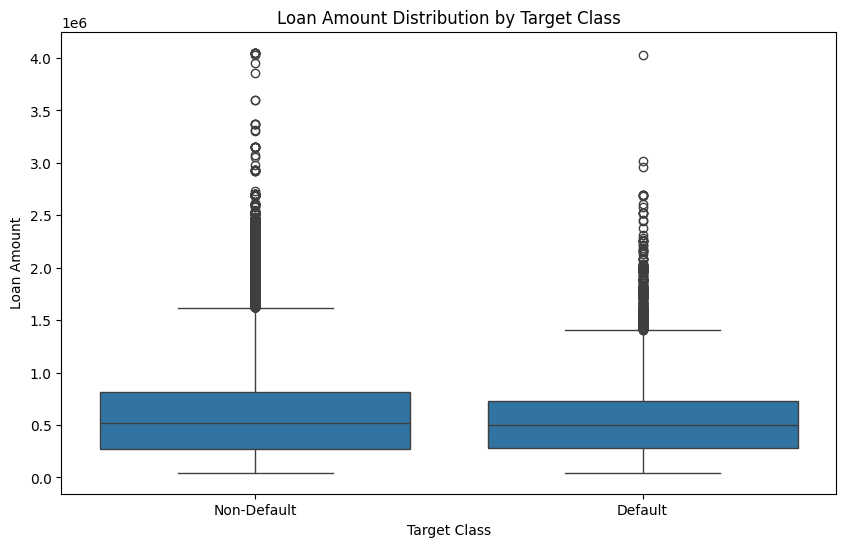

In [15]:
#Plotting a boxplot to compare the distribution of loan amounts between default and non-default classes.
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=data_df)
plt.title('Loan Amount Distribution by Target Class')
plt.xlabel('Target Class')
plt.ylabel('Loan Amount')
plt.xticks([0, 1], ['Non-Default', 'Default'])
plt.show()